<a href="https://colab.research.google.com/github/Sagar-modelling/Motif_Discord/blob/main/stumpy_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install stumpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 136 kB 8.3 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt
import stumpy

plt.rcParams["figure.figsize"] = [20, 6]  # width, height
plt.rcParams['xtick.direction'] = 'out'

ERROR:numba.cuda.cudadrv.driver:Call to cuInit results in CUDA_ERROR_NO_DEVICE


In [ ]:
steam_df = pd.read_csv("https://zenodo.org/record/4273921/files/STUMPY_Basics_steamgen.csv?download=1")
steam_df.head()

,drum pressure,excess oxygen,water level,steam flow
0,320.08239,2.506774,0.032701,9.302970
1,321.71099,2.545908,0.284799,9.662621
2,320.91331,2.360562,0.203652,10.990955
3,325.00252,0.027054,0.326187,12.430107
4,326.65276,0.285649,0.753776,13.681666


In [ ]:
steam_df.shape

(9600, 4)

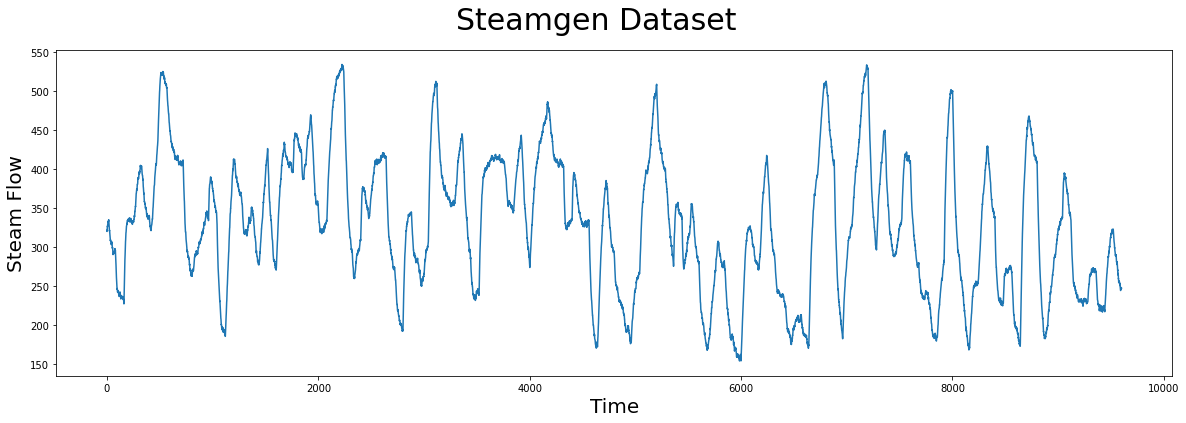

In [ ]:
plt.suptitle('Steamgen Dataset', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('Steam Flow', fontsize='20')
plt.plot(steam_df['drum pressure'].values)

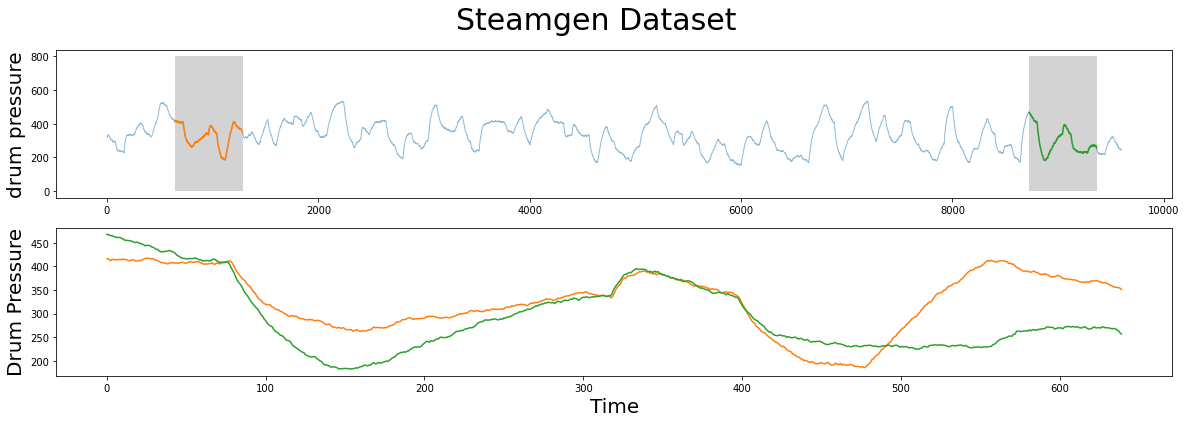

In [ ]:
m = 640 #subsequence length
fig, axs = plt.subplots(2)
plt.suptitle('Steamgen Dataset', fontsize='30')
axs[0].set_ylabel("drum pressure", fontsize='20')
axs[0].plot(steam_df['drum pressure'], alpha=0.5, linewidth=1)
axs[0].plot(steam_df['drum pressure'].iloc[643:643+m])
axs[0].plot(steam_df['drum pressure'].iloc[8724:8724+m])

rect = Rectangle((643, 0), m, 800, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((8724, 0), m, 800, facecolor='lightgrey')
axs[0].add_patch(rect)

axs[1].set_xlabel("Time", fontsize='20')
axs[1].set_ylabel("Drum Pressure", fontsize='20')
axs[1].plot(steam_df['drum pressure'].values[643:643+m], color='C1')
axs[1].plot(steam_df['drum pressure'].values[8724:8724+m], color='C2')

In [ ]:
#finding motif using stump
m =640
mp = stumpy.stump(steam_df['drum pressure'], m)

In [ ]:
#The output of stump is an array that contains all of the matrix profile values (i.e., z-normalized Euclidean distance to your nearest neighbor)
#and matrix profile indices in the first and second columns

In [ ]:
mp

array([[18.38179539011476, 6264, -1, 6264],
       [18.355130052542606, 6264, -1, 6264],
       [18.328800304965124, 6265, -1, 6265],
       ...,
       [16.34367394563706, 2077, 2077, -1],
       [16.33470684811535, 2078, 2078, -1],
       [16.32310433027697, 2079, 2079, -1]], dtype=object)

In [ ]:
mp[:, 0].min()

9.17763228700418

In [ ]:
motif_idx = np.argsort(mp[:, 0])[0]
print(f"The motif is located at index {motif_idx}")

The motif is located at index 6404


In [ ]:
nearest_neighbor_idx = mp[motif_idx, 1]
print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")

The nearest neighbor is located at index 4799


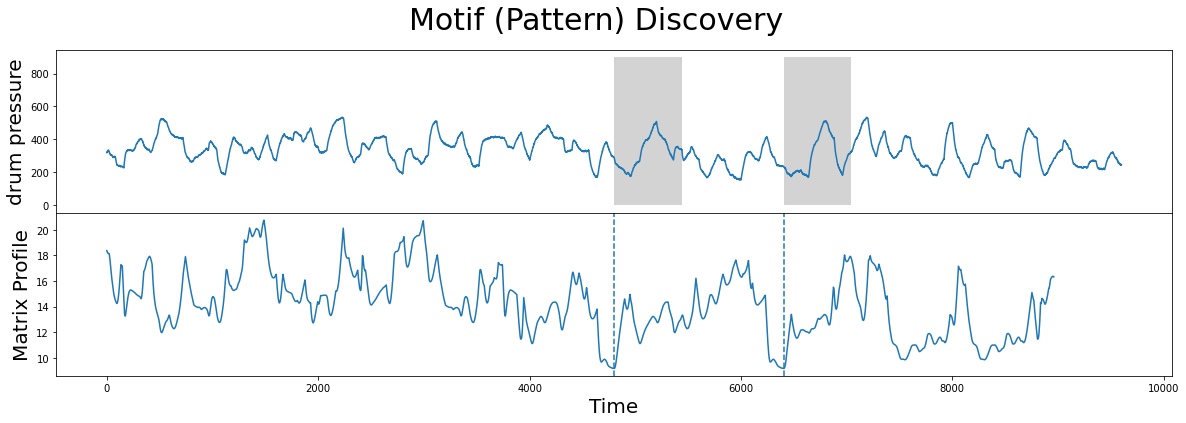

In [ ]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')
axs[0].plot(steam_df['drum pressure'].values)
axs[0].set_ylabel('drum pressure', fontsize='20')
rect = Rectangle((6404, 0), m, 900, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((4799, 0), m, 900, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')

axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=6404, linestyle="dashed")
axs[1].axvline(x=4799, linestyle="dashed")
axs[1].plot(mp[:, 0])

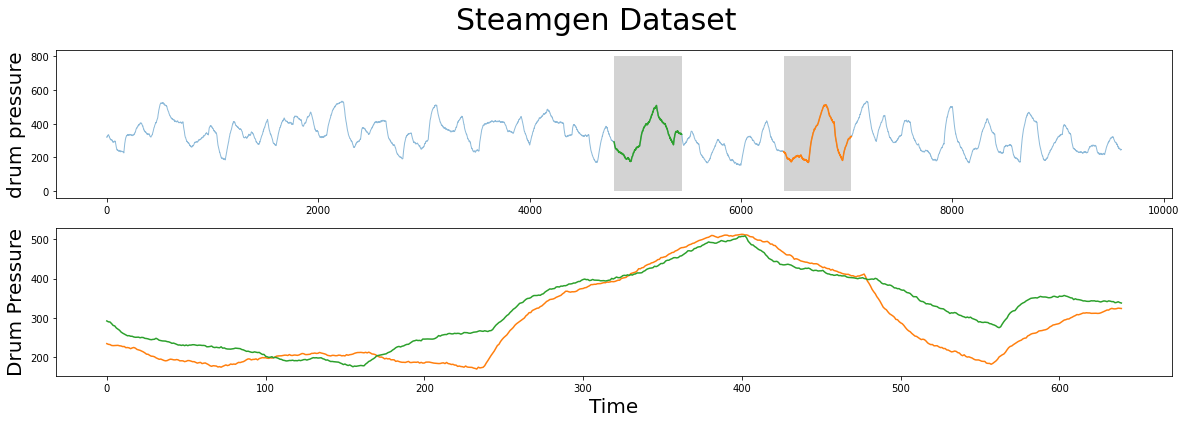

In [ ]:
m = 640 #subsequence length
fig, axs = plt.subplots(2)
plt.suptitle('Steamgen Dataset', fontsize='30')
axs[0].set_ylabel("drum pressure", fontsize='20')
axs[0].plot(steam_df['drum pressure'], alpha=0.5, linewidth=1)
axs[0].plot(steam_df['drum pressure'].iloc[6404:6404+m])
axs[0].plot(steam_df['drum pressure'].iloc[4799:4799+m])

rect = Rectangle((6404, 0), m, 800, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((4799, 0), m, 800, facecolor='lightgrey')
axs[0].add_patch(rect)

axs[1].set_xlabel("Time", fontsize='20')
axs[1].set_ylabel("Drum Pressure", fontsize='20')
axs[1].plot(steam_df['drum pressure'].values[6404:6404+m], color='C1')
axs[1].plot(steam_df['drum pressure'].values[4799:4799+m], color='C2')

In [ ]:
discord_idx = np.argsort(mp[:, 0])[-1]
print(f"The discord is located at index {discord_idx}")

The discord is located at index 1487


In [ ]:
nearest_neighbor_idx = mp[discord_idx, 1]
print(f"The nearest neighbor for discord is located at index {nearest_neighbor_idx}")

The nearest neighbor for discord is located at index 8051


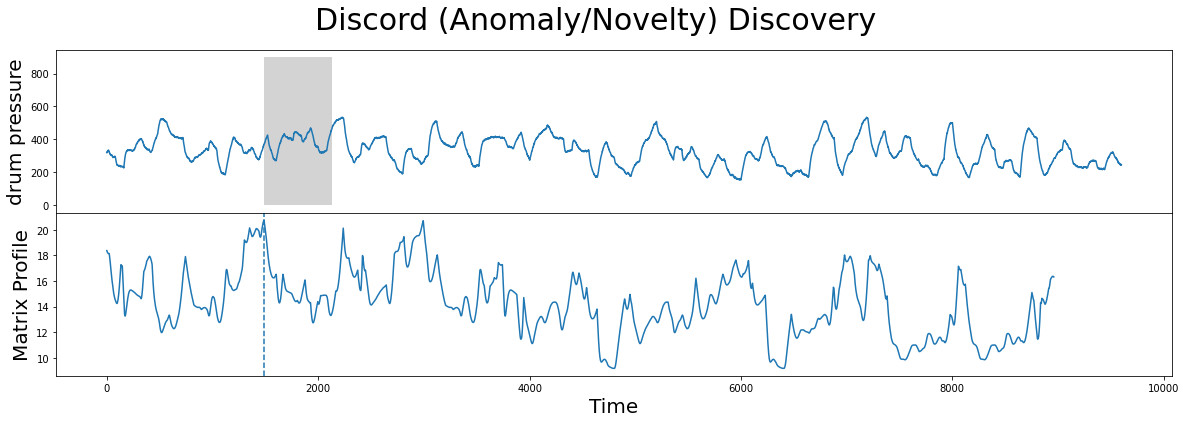

In [ ]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Discord (Anomaly/Novelty) Discovery', fontsize='30')

axs[0].plot(steam_df['drum pressure'].values)
axs[0].set_ylabel('drum pressure', fontsize='20')
rect = Rectangle((discord_idx, 0), m, 900, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=discord_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.show()

In [ ]:
taxi_df = pd.read_csv("https://zenodo.org/record/4276428/files/STUMPY_Basics_Taxi.csv?download=1")
taxi_df['value'] = taxi_df['value'].astype(np.float64)
taxi_df['timestamp'] = pd.to_datetime(taxi_df['timestamp'])
taxi_df

,timestamp,value
0,2014-10-01 00:00:00,12751.0
1,2014-10-01 00:30:00,8767.0
2,2014-10-01 01:00:00,7005.0
3,2014-10-01 01:30:00,5257.0
4,2014-10-01 02:00:00,4189.0
...,...,...
3595,2014-12-14 21:30:00,16344.0
3596,2014-12-14 22:00:00,15913.0
3597,2014-12-14 22:30:00,14327.0
3598,2014-12-14 23:00:00,12060.0


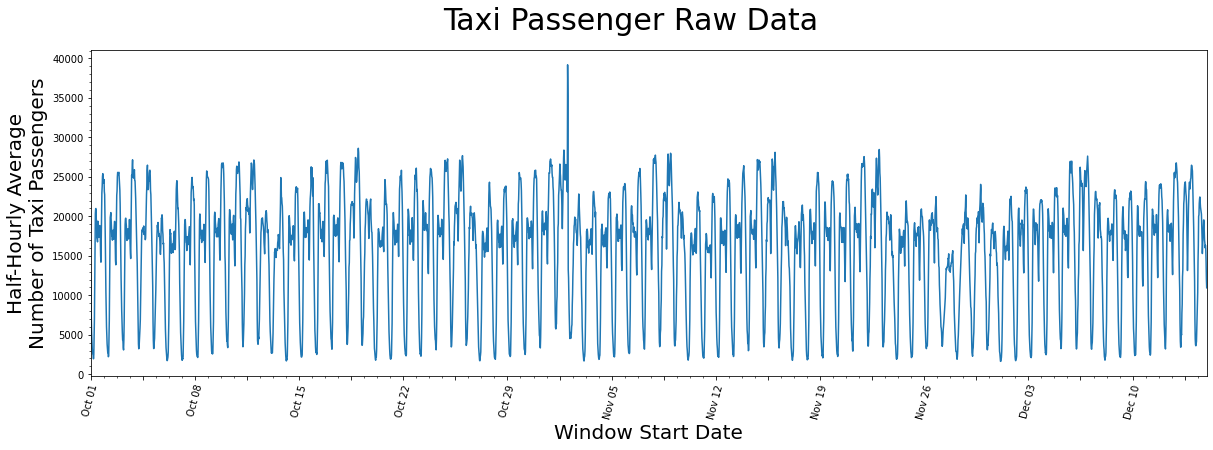

In [ ]:
# This code is going to be utilized to control the axis labeling of the plots
DAY_MULTIPLIER = 7  # Specify for the amount of days you want between each labeled x-axis tick

x_axis_labels = taxi_df[(taxi_df.timestamp.dt.hour==0)]['timestamp'].dt.strftime('%b %d').values[::DAY_MULTIPLIER]
x_axis_labels[1::2] = " "
x_axis_labels, DAY_MULTIPLIER

plt.suptitle('Taxi Passenger Raw Data', fontsize='30')
plt.xlabel('Window Start Date', fontsize ='20')
plt.ylabel('Half-Hourly Average\nNumber of Taxi Passengers', fontsize='20')
plt.plot(taxi_df['value'])

plt.xticks(np.arange(0, taxi_df['value'].shape[0], (48*DAY_MULTIPLIER)/2), x_axis_labels)
plt.xticks(rotation=75)
plt.minorticks_on()
plt.margins(x=0)
plt.show()

In [ ]:
m = 48
mp = stumpy.stump(taxi_df['value'], m=m)

In [104]:
mp #0 index denotes the eucledian distance corresponding to nearest neighbour
   #1 index denotes the location of the nearest neighbour
   #2 index denotes location of left nearest neighbour
   #3 index denotes location of right nearest neighbour

array([[0.4625364182693321, 1680, -1, 1680],
       [0.4654127305310222, 1681, -1, 1681],
       [0.46710423514406935, 1682, -1, 1682],
       ...,
       [0.8037904104566025, 3214, 3214, -1],
       [0.8152584154200521, 3215, 3215, -1],
       [0.8293360140039625, 2208, 2208, -1]], dtype=object)

In [ ]:
mp[:,0].max(), mp[:,0].min()

(3.5225112340749614, 0.3196090265489718)

In [ ]:
motif_idx = np.argsort(mp[:, 0])[0]
print(f"The motif is located at index {motif_idx}")

The motif is located at index 27


In [ ]:
nearest_neighbor_idx = mp[motif_idx, 1]
print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")

The nearest neighbor is located at index 363


In [ ]:
discord_idx = np.argsort(mp[:, 0])[-1]
print(f"The discord is located at index {discord_idx}")

The discord is located at index 1537


In [ ]:
nearest_neighbor_discord_idx = mp[discord_idx, 1]
print(f"The nearest neighbor for discord is located at index {nearest_neighbor_discord_idx}")

The nearest neighbor for discord is located at index 193


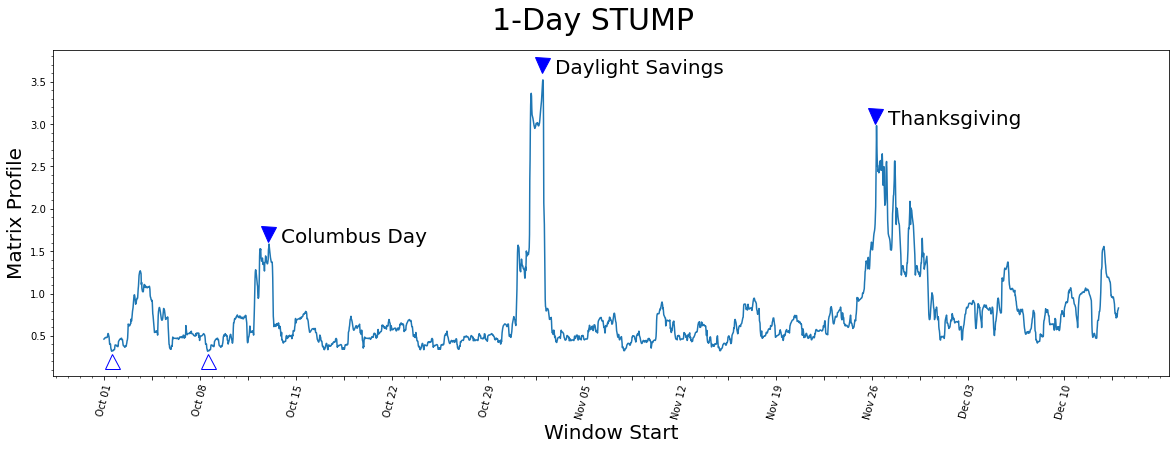

In [ ]:
plt.suptitle('1-Day STUMP', fontsize='30')
plt.xlabel('Window Start', fontsize ='20')
plt.ylabel('Matrix Profile', fontsize='20')
plt.plot(mp[:, 0])

plt.plot(575, 1.7, marker="v", markersize=15, color='b')
plt.text(620, 1.6, 'Columbus Day', color="black", fontsize=20)
plt.plot(1535, 3.7, marker="v", markersize=15, color='b')
plt.text(1580, 3.6, 'Daylight Savings', color="black", fontsize=20)
plt.plot(2700, 3.1, marker="v", markersize=15, color='b')
plt.text(2745, 3.0, 'Thanksgiving', color="black", fontsize=20)
plt.plot(30, .2, marker="^", markersize=15, color='b', fillstyle='none')
plt.plot(363, .2, marker="^", markersize=15, color='b', fillstyle='none')
plt.xticks(np.arange(0, 3553, (m*DAY_MULTIPLIER)/2), x_axis_labels)
plt.xticks(rotation=75)
plt.minorticks_on()
plt.show()

In [ ]:
#Different Window sizes
days_dict ={
  "Half-Day": 24,
  "1-Day": 48,
  "2-Days": 96,
  "5-Days": 240,
  "7-Days": 336,
}

days_df = pd.DataFrame.from_dict(days_dict, orient='index', columns=['m'])
days_df.head()

,m
Half-Day,24
1-Day,48
2-Days,96
5-Days,240
7-Days,336


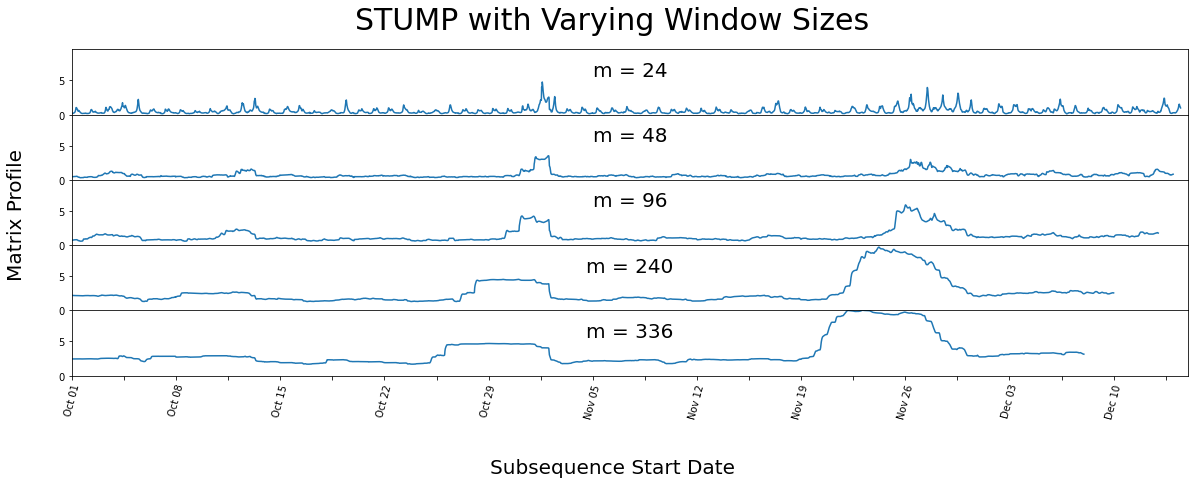

In [ ]:
fig, axs = plt.subplots(5, sharex=True, gridspec_kw={'hspace': 0})
fig.text(0.5, -0.1, 'Subsequence Start Date', ha='center', fontsize='20')
fig.text(0.08, 0.5, 'Matrix Profile', va='center', rotation='vertical', fontsize='20')
for i, varying_m in enumerate(days_df['m'].values):
    mp = stumpy.stump(taxi_df['value'], varying_m)
    axs[i].plot(mp[:, 0])
    axs[i].set_ylim(0,9.5)
    axs[i].set_xlim(0,3600)
    title = f"m = {varying_m}"
    axs[i].set_title(title, fontsize=20, y=.5)
plt.xticks(np.arange(0, taxi_df.shape[0], (48*DAY_MULTIPLIER)/2), x_axis_labels)
plt.xticks(rotation=75)
plt.suptitle('STUMP with Varying Window Sizes', fontsize='30')
plt.show()

In [134]:
df = pd.DataFrame(mp)
df.rename(columns={0: 'euc_distance',
                   1: 'nearest_neighbour'},
          inplace=True, errors='raise')

df = df[['euc_distance', 'nearest_neighbour', 2, 3]].apply(pd.to_numeric, axis = 1)
df

,euc_distance,nearest_neighbour,2,3
0,0.462536,1680.0,-1.0,1680.0
1,0.465413,1681.0,-1.0,1681.0
2,0.467104,1682.0,-1.0,1682.0
3,0.473099,1683.0,-1.0,1683.0
4,0.478382,1684.0,-1.0,1684.0
...,...,...,...,...
3548,0.753040,2204.0,2204.0,-1.0
3549,0.797730,3213.0,3213.0,-1.0
3550,0.803790,3214.0,3214.0,-1.0
3551,0.815258,3215.0,3215.0,-1.0


In [137]:
df_f = df.nsmallest(n=10, columns=['euc_distance', 'nearest_neighbour']) #Top 10 Motif points
df_f

,euc_distance,nearest_neighbour,2,3
363,0.319609,27.0,27.0,1371.0
27,0.319609,363.0,3.0,363.0
368,0.324685,32.0,32.0,1376.0
32,0.324685,368.0,8.0,368.0
367,0.326022,31.0,31.0,1375.0
31,0.326022,367.0,7.0,367.0
366,0.326104,30.0,30.0,1374.0
30,0.326104,366.0,6.0,366.0
2157,0.326345,1821.0,1821.0,2493.0
1821,0.326345,2157.0,813.0,2157.0


In [144]:
df_f = df.nlargest(n=10, columns=['euc_distance', 'nearest_neighbour']) #Top 10 discord points
df_f

,euc_distance,nearest_neighbour,2,3
1537,3.522511,193.0,193.0,1873.0
1536,3.506993,192.0,192.0,3216.0
1538,3.491024,194.0,194.0,1874.0
1535,3.469006,191.0,191.0,3215.0
1534,3.407557,862.0,862.0,3214.0
1496,3.363804,3176.0,1160.0,3176.0
1533,3.335592,861.0,861.0,3213.0
1497,3.330920,3177.0,825.0,3177.0
1495,3.321688,2503.0,1159.0,2503.0
1532,3.273959,860.0,860.0,1868.0


In [ ]:
plt.suptitle('Taxi Passenger Raw Data', fontsize='30')
plt.xlabel('Window Start Date', fontsize ='20')
plt.ylabel('Half-Hourly Average\nNumber of Taxi Passengers', fontsize='20')
plt.plot(taxi_df['value'])

axs[0].set_xticks(np.arange(0, taxi_df['value'].shape[0], (48*DAY_MULTIPLIER)/2), x_axis_labels)
axs[0].set_xticks.xticks(rotation=75)
axs[0].set_xticks.minorticks_on()
axs[0].set_xticks.margins(x=0)

## Motif based on minimum Eucledian distance

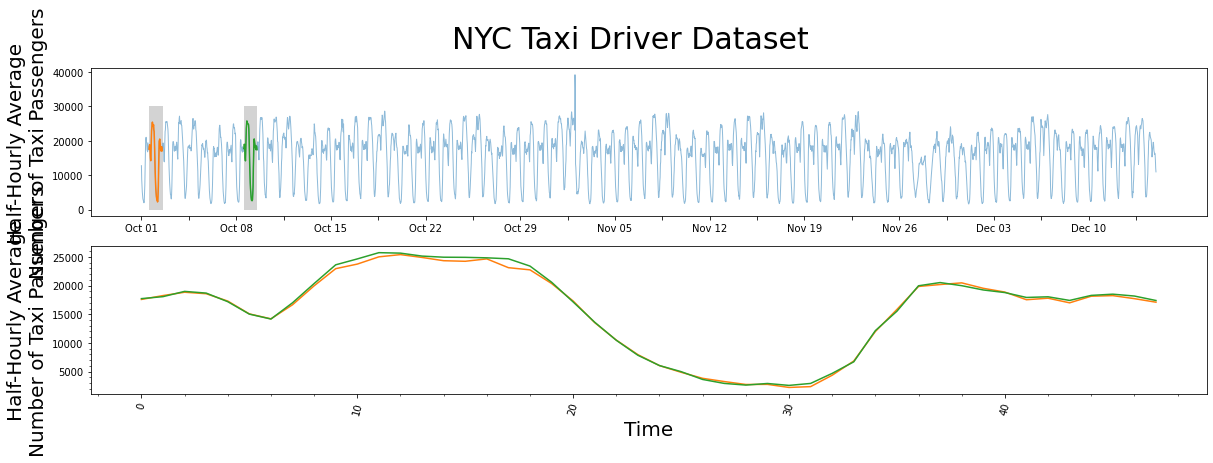

In [169]:
m = 48 #subsequence length
fig, axs = plt.subplots(2)
plt.suptitle('NYC Taxi Driver Dataset', fontsize='30')
axs[0].set_ylabel("Half-Hourly Average\nNumber of Taxi Passengers", fontsize='20')
axs[0].plot(taxi_df['value'], alpha=0.5, linewidth=1)
axs[0].plot(taxi_df['value'].iloc[27:27+m])
axs[0].plot(taxi_df['value'].iloc[363:363+m])

rect = Rectangle((27, 0), m, 30000, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((363, 0), m, 30000, facecolor='lightgrey')
axs[0].add_patch(rect)

axs[1].set_xlabel("Time", fontsize='20')
axs[1].set_ylabel("Half-Hourly Average\nNumber of Taxi Passengers", fontsize='20')
axs[1].plot(taxi_df['value'].values[27:27+m], color='C1')
axs[1].plot(taxi_df['value'].values[363:363+m], color='C2')
plt.setp(axs[0], xticks=(np.arange(0, taxi_df['value'].shape[0], (48*DAY_MULTIPLIER)/2)), xticklabels = x_axis_labels)
plt.xticks(rotation=75)
plt.minorticks_on()
plt.show()

## Discord(anomaly) based on maximum Eucledian Distance

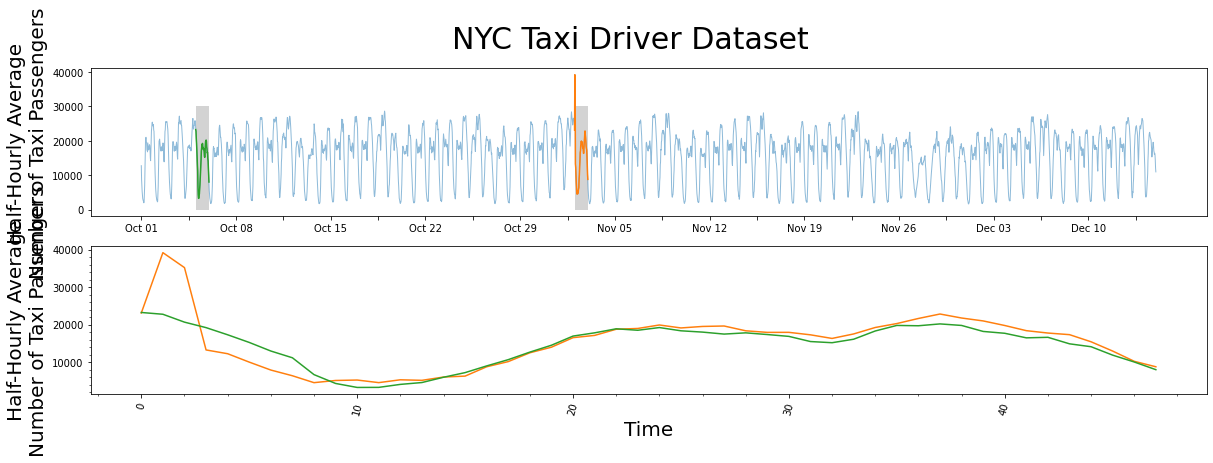

In [171]:
m = 48 #subsequence length
fig, axs = plt.subplots(2)
plt.suptitle('NYC Taxi Driver Dataset', fontsize='30')
axs[0].set_ylabel("Half-Hourly Average\nNumber of Taxi Passengers", fontsize='20')
axs[0].plot(taxi_df['value'], alpha=0.5, linewidth=1)
axs[0].plot(taxi_df['value'].iloc[1537:1537+m])
axs[0].plot(taxi_df['value'].iloc[193:193+m])

rect = Rectangle((1537, 0), m, 30000, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((193, 0), m, 30000, facecolor='lightgrey')
axs[0].add_patch(rect)

axs[1].set_xlabel("Time", fontsize='20')
axs[1].set_ylabel("Half-Hourly Average\nNumber of Taxi Passengers", fontsize='20')
axs[1].plot(taxi_df['value'].values[1537:1537+m], color='C1')
axs[1].plot(taxi_df['value'].values[193:193+m], color='C2')
plt.setp(axs[0], xticks=(np.arange(0, taxi_df['value'].shape[0], (48*DAY_MULTIPLIER)/2)), xticklabels = x_axis_labels)
plt.xticks(rotation=75)
plt.minorticks_on()
plt.show()